# Import Libraries

In [ ]:
#!pip install pyclustering
#!pip install openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clean and preprocess data

In [ ]:
# Load dataset
df2 = pd.read_csv('sample_data/creditcard.csv')

# Handle missing values
df2.dropna(inplace=True)
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2.select_dtypes(include=[np.number]))

# Reduce dimension

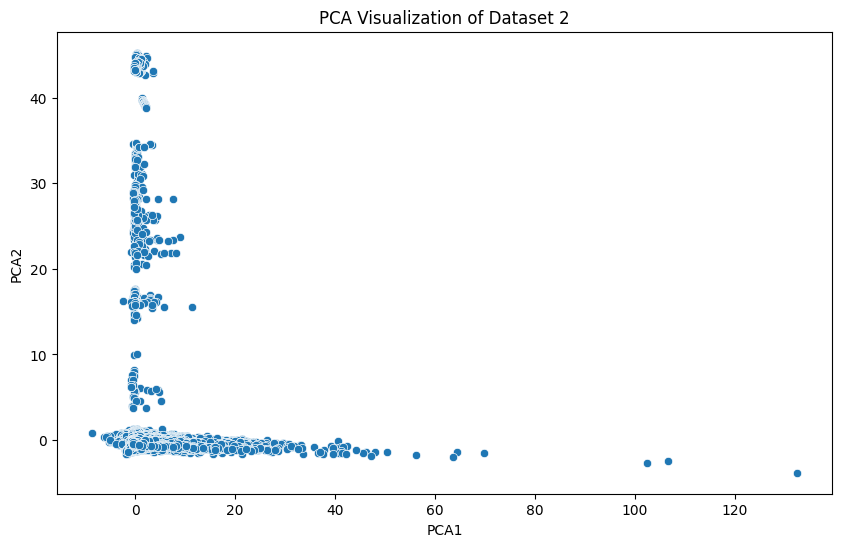

In [ ]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df2_pca_array = pca.fit_transform(df2_scaled)

# Convert the NumPy array into a DataFrame
df2_pca = pd.DataFrame(data=df2_pca_array, columns=['PCA1', 'PCA2'])

# Visualize Dataset_2 PCA Results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2_pca['PCA1'], y=df2_pca['PCA2'])
plt.title("PCA Visualization of Dataset 2")
plt.show()

# Implement cluster technique CLIQUE

In [ ]:
from pyclustering.cluster.clique import clique

# Convert the PCA DataFrame into a list of lists for CLIQUE
data_pca = df2_pca_array.tolist()  # Use the first 2 PCA components

# Initialize CLIQUE clustering model
clique_instance = clique(data_pca, amount_intervals=14, density_threshold=10)  # Adjust parameters if needed

# Process the clustering
clique_instance.process()

# Get the clusters
clusters = clique_instance.get_clusters()

# Output the number of clusters
print(f"Number of clusters: {len(clusters)}")

# Assign the cluster labels back to your dataframe (df1_pca)
df2_pca['Cluster'] = -1  # Set default cluster value to -1
for idx, cluster in enumerate(clusters):
    for point_index in cluster:
        df2_pca.loc[point_index, 'Cluster'] = idx  # Assign cluster label to the point

# Show the first few rows of the resulting dataset with clusters
print(df2_pca.head())

Number of clusters: 4
       PCA1      PCA2  Cluster
0  0.418406  0.707299        0
1 -0.392155  0.577863        0
2  1.870339  0.698912        0
3  0.316741  0.485520        0
4 -0.003562  0.407770        0


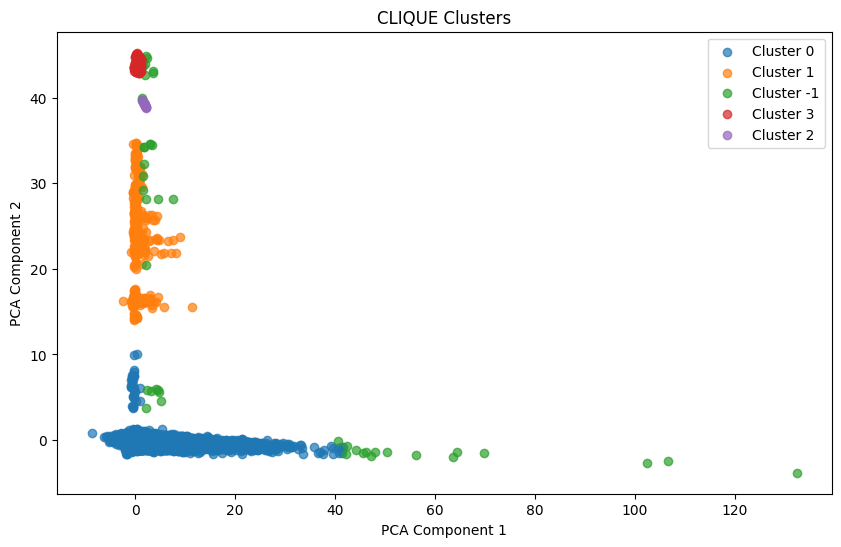

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster_id in df2_pca['Cluster'].unique():
    cluster_data = df2_pca[df2_pca['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f"Cluster {cluster_id}", alpha=0.7)

# Add labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("CLIQUE Clusters")

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Ensure that the cluster assignments are in a format suitable for these metrics
labels = df2_pca['Cluster'].values

# Silhouette Score (higher is better)
sil_score = silhouette_score(df2_pca[['PCA1', 'PCA2']], labels)
print(f"Silhouette Score: {sil_score}")

# Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(df2_pca[['PCA1', 'PCA2']], labels)
print(f"Davies-Bouldin Index: {db_index}")

# Calinski-Harabasz Index (higher is better)
ch_index = calinski_harabasz_score(df2_pca[['PCA1', 'PCA2']], labels)
print(f"Calinski-Harabasz Index: {ch_index}")


Silhouette Score: 0.9563521875380365
Davies-Bouldin Index: 1.2769674478739952
Calinski-Harabasz Index: 53262.223212863995
